# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = './Dataset/creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# About dataset 

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
# Changing the column names 

df.rename(columns={'Time': 'Time(s)', 'Amount': 'Amount($)', 'Class':'Fraud'}, inplace=True)
df

,Time(s),V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount($),Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time(s)    284807 non-null  float64
 1   V1         284807 non-null  float64
 2   V2         284807 non-null  float64
 3   V3         284807 non-null  float64
 4   V4         284807 non-null  float64
 5   V5         284807 non-null  float64
 6   V6         284807 non-null  float64
 7   V7         284807 non-null  float64
 8   V8         284807 non-null  float64
 9   V9         284807 non-null  float64
 10  V10        284807 non-null  float64
 11  V11        284807 non-null  float64
 12  V12        284807 non-null  float64
 13  V13        284807 non-null  float64
 14  V14        284807 non-null  float64
 15  V15        284807 non-null  float64
 16  V16        284807 non-null  float64
 17  V17        284807 non-null  float64
 18  V18        284807 non-null  float64
 19  V19        284807 non-n

In [5]:
# Check number of missing values in each column

df.isnull().sum()

Time(s)      0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
Amount($)    0
Fraud        0
dtype: int64

<b>We can see we have no missing values. </b>

In [6]:
# Distribution go legit transaction and fraud transaction

df['Fraud'].value_counts() # 1 are fraud transaction whereas 0 are legit transaction

0    284315
1       492
Name: Fraud, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


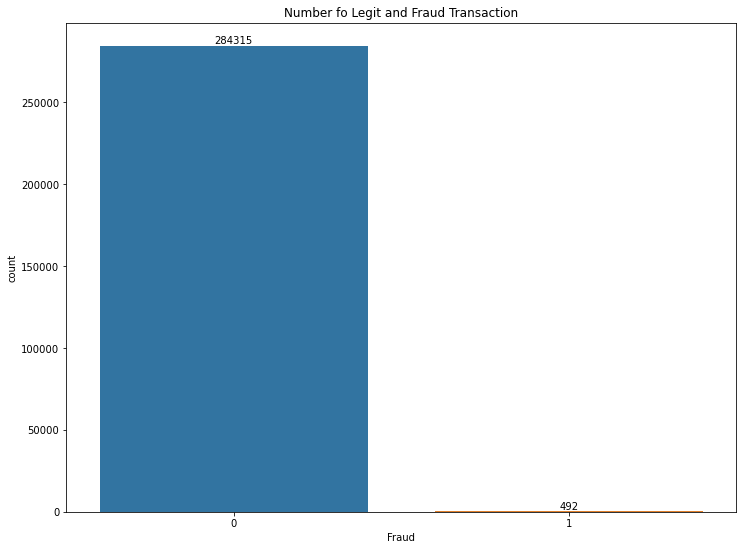

In [7]:
# Visualising the data

plt.figure(figsize=(12, 9))

fig = sns.countplot(df['Fraud'])
plt.title("Number fo Legit and Fraud Transaction")
fig.bar_label(fig.containers[0])
plt.show()

In [8]:
df['Fraud'].value_counts()[0]

284315

In [9]:
# Checking the percent of values that are legit

legit_percent = df['Fraud'].value_counts()[0]*100/(df['Fraud'].value_counts()[0] + df['Fraud'].value_counts()[1])
legit_percent

99.827251436938

We can see the data is highly imbalanced so we cannot traing our model directly on this dataset as it would predict the new transaction as legit because of high imbalance even if it would be fraud.

In [10]:
# Splitting the data into to parts - legit & fraud

legit = df[df['Fraud'] == 0]
fraud = df[df['Fraud'] == 1]

In [352]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Statistical Measures of Data

In [12]:
legit['Amount($)'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount($), dtype: float64

In [13]:
fraud['Amount($)'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount($), dtype: float64

### The first insight that we can see is that the average amount in fraud transaction is much higher than the amount in legit transaction

In [16]:
# Comparing all the fields

df.groupby('Fraud', as_index=False).mean()

,Fraud,Time(s),V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount($)
0,0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### We can see a clear diffrence between tha mean values for all columns in legit and fraud transaction

# Under-Sampling

We can see the data is highly imbalanced. So to overcome this situation we would re-sample our dataset. We have 492 samples of Fraud transaction. We would randomly choose 492 transaction from legit sample and concat both the datasets. In this way we will have a dataset with equal number of legit and fraud samples which would be highly balanced.

In [17]:
legit_sample = legit.sample(n = 492, random_state=42, axis=0)

In [23]:
# Concating two dataframes

credit_card_df = pd.concat([legit_sample, fraud], axis=0)
credit_card_df.reset_index(drop=True)


,Time(s),V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount($),Fraud
0,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
1,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
2,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
3,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
4,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [24]:
# Let us find out the values

credit_card_df['Fraud'].value_counts()

0    492
1    492
Name: Fraud, dtype: int64

In [25]:
# Comparing mean of both classes

credit_card_df.groupby('Fraud').mean()

,Time(s),V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount($)
Fraud,,,,,,,,,,,,,,,,,,,,,
0,95052.758130,0.153312,0.009649,-0.038029,-0.027323,0.061966,-0.053962,0.013795,0.014911,0.037348,...,0.015030,0.014059,-0.020781,0.013223,-0.007257,0.024646,-0.027696,0.011070,-0.002305,80.348354
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### We can see that the values are not very different from real dataset. Therefore we can say that we had a fair distribution in new dataset

# Model our Data

In [26]:
# Spliting the data

X = credit_card_df.drop(columns='Fraud', axis = 1)
y = credit_card_df['Fraud']

In [46]:
# Spliting into train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 
#stratify is used to maintain the same proportion of samples even in training and testing dataset

### Model training

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Training the model
lr.fit(X_train, y_train)

# Predicting our model
yhat = lr.predict(X_test)
yhat

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

### Evaluation

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, yhat)

0.949238578680203

In [49]:
#Testing accuracy score on training data

accuracy_score(y_train, lr.predict(X_train))

0.9339263024142312

We can see the accuracy score of training data and testing data are somewhat similar. So we can say that our model has neither overfitted nor udnerfitted the training points.

# ANOTHER MODEL

What if we train or model on selected features rather than all the features. Select only the features that have greater correlation:

In [130]:
mod_credit_card_df = credit_card_df.drop(['Time(s)', 'Amount($)'], axis=1)
selective = mod_credit_card_df.corr()['Fraud'].to_frame()
selective = selective.sort_index()
selective["index"] = range(0, len(selective))
selective = selective[selective['index']!=0]
selective.drop('index', axis=1, inplace=True)
selective

,Fraud
V1,-0.446093
V10,-0.628327
V11,0.685056
V12,-0.682039
V13,-0.078165
V14,-0.749228
V15,-0.057636
V16,-0.597790
V17,-0.559169
V18,-0.464857


In [131]:
# Let us define a threshold of 0.5 and -0.5 
good_features = selective[(selective['Fraud']>=0.5) | (selective['Fraud']<=-0.5)]
good_features

,Fraud
V10,-0.628327
V11,0.685056
V12,-0.682039
V14,-0.749228
V16,-0.597790
V17,-0.559169
V3,-0.564371
V4,0.712610
V9,-0.559589


Let us just use these features to predict the same data:

In [366]:
X_data1 = credit_card_df[['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]
y_data1 = credit_card_df['Fraud']

In [367]:
# Model training

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_data1, test_size=0.2, random_state=42, stratify=y)

lr = LogisticRegression()
lr.fit(X_train1, y_train1)
yhat1 = lr.predict(X_test1)
yhat1

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [368]:
# Calculating training and testing accuracy

print("The test accuracy score is :", accuracy_score(y_test1, yhat1))
print("The train accuracy score is :", accuracy_score(y_train1, lr.predict(X_train1)))

The test accuracy score is : 0.9593908629441624
The train accuracy score is : 0.940279542566709


Therefore here we can say that we got a better accuracy score and even dimension reduction.

### What would happen by changing the threshold ?

Let us plot the accuracy score for various threshold?

In [369]:
import matplotlib.pyplot as plt

In [374]:
thres = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

In [389]:
test_acc = []
train_acc = []

for i in thres:
    good_features = selective[(selective['Fraud']>= i ) | (selective['Fraud']<= -i)]
    
    X_data2 = credit_card_df[good_features.index]
    y_data2 = credit_card_df['Fraud']
    
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.2, random_state=42, 
                                                            stratify=y_data2)
    
    lr = LogisticRegression()
    lr.fit(X_train2, y_train2)
    yhat2 = lr.predict(X_test2)
    
    test_acc.append(round(accuracy_score(y_test2, yhat2), 3))
    train_acc.append(round(accuracy_score(y_train2, lr.predict(X_train2)), 3))
    
print(test_acc, train_acc)

[0.97, 0.964, 0.964, 0.97, 0.959, 0.964, 0.944] [0.94, 0.936, 0.936, 0.938, 0.94, 0.94, 0.928]


<Figure size 864x648 with 0 Axes>

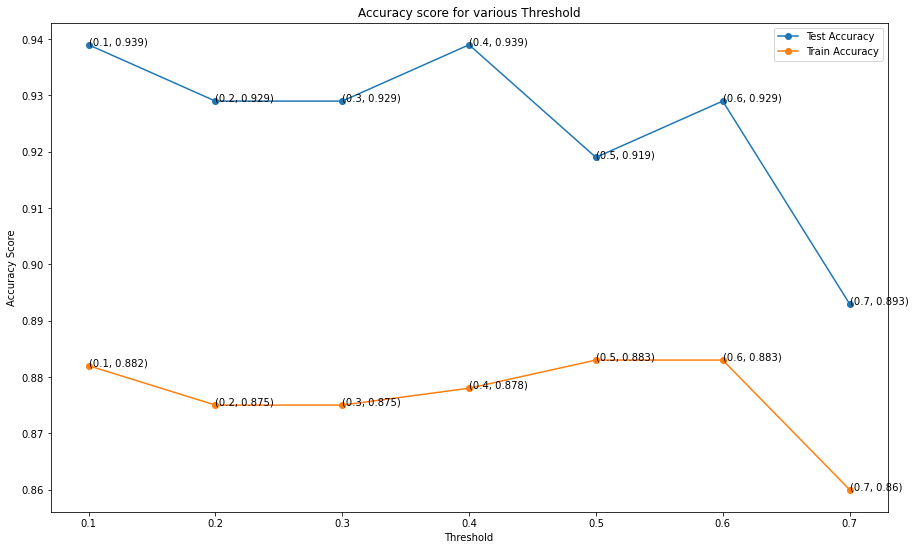

In [405]:
plt.figure(figsize=(12, 9))

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)

ax.plot(thres, test_acc, label = "Test Accuracy", marker = 'o')
for xy in zip(thres, test_acc):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

ax.plot(thres, train_acc, label = "Train Accuracy", marker = 'o')
for xy in zip(thres, train_acc):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.title("Accuracy score for various Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

# Therefore, we can see that mximum occurs at threshold 0.4 with accuracy score of 0.97 in testing set and 0.93 on training set.

## Let us use jaccard index to verify this:

In [402]:
test_acc = []
train_acc = []

for i in thres:
    good_features = selective[(selective['Fraud']>= i ) | (selective['Fraud']<= -i)]
    
    X_data2 = credit_card_df[good_features.index]
    y_data2 = credit_card_df['Fraud']
    
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.2, random_state=42, 
                                                            stratify=y_data2)
    
    lr = LogisticRegression()
    lr.fit(X_train2, y_train2)
    yhat2 = lr.predict(X_test2)
    
    test_acc.append(round(jaccard_score(y_test2, yhat2), 3))
    train_acc.append(round(jaccard_score(y_train2, lr.predict(X_train2)), 3))
    
print(test_acc, train_acc)

[0.939, 0.929, 0.929, 0.939, 0.919, 0.929, 0.893] [0.882, 0.875, 0.875, 0.878, 0.883, 0.883, 0.86]


<Figure size 864x648 with 0 Axes>

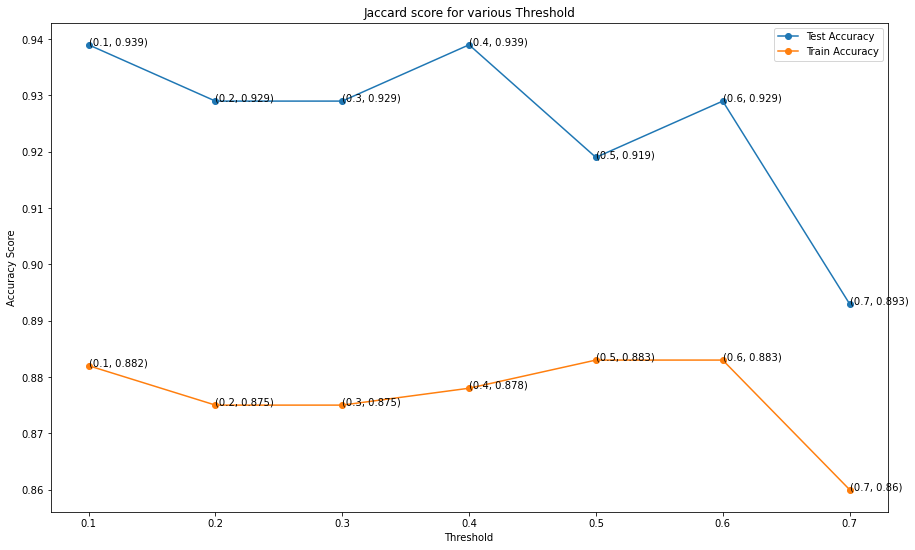

In [406]:
plt.figure(figsize=(12, 9))

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)

ax.plot(thres, test_acc, label = "Test Accuracy", marker = 'o')
for xy in zip(thres, test_acc):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

ax.plot(thres, train_acc, label = "Train Accuracy", marker = 'o')
for xy in zip(thres, train_acc):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.title("Jaccard score for various Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

# Therefore, we can see that mximum occurs at threshold 0.4 with accuracy score of 0.97 in testing set and 0.93 on training set even with Jaccadr index also.
